# Copula Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [18]:
rho = 0.99
Z2 = np.random.normal(size=(1000,2))
Z2[:,1] = Z2 @ np.array([rho, np.sqrt(1-rho**2)])

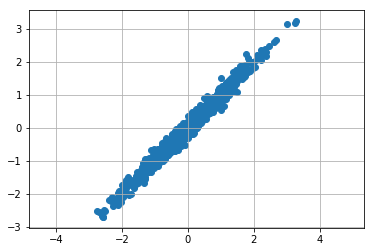

In [19]:
# Plot on the domain of normal distribution [-infty, infty]
plt.scatter(Z2[:,0], Z2[:,1])
plt.axis('equal')
plt.grid()
plt.show()

In [20]:
Z2

array([[-1.30308446, -1.4936323 ],
       [ 0.29151447,  0.15224584],
       [-0.25011293, -0.39434341],
       ..., 
       [ 0.5084825 ,  0.49482632],
       [ 1.20513771,  1.29785904],
       [-0.56761674, -0.77577066]])

In [21]:
U2 = ss.norm.cdf(Z2)
U2

array([[ 0.09627296,  0.06763588],
       [ 0.61467106,  0.56050348],
       [ 0.40125001,  0.34666376],
       ..., 
       [ 0.69444249,  0.68963864],
       [ 0.88592493,  0.90283211],
       [ 0.28514762,  0.21894221]])

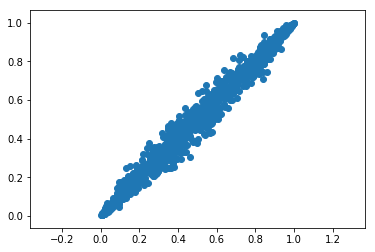

In [22]:
# Plot on the domain of uniform distribution [0,1]
plt.scatter(U2[:,0], U2[:,1])
plt.axis('equal')
plt.show()

In [23]:
# Now use the joint pair (U1, U2) pair to the default rate
lam = 1
default = -np.log(U2)/lam

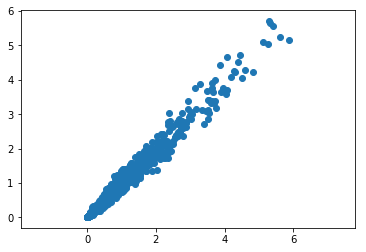

In [24]:
plt.scatter(default[:,0], default[:,1])
plt.axis('equal')
plt.show()

## We create a Gaussian copula function

In [2]:
def CopulaGaussian(n_var=2, n_sample=1000, rho=0.0):
    corr_mat = np.eye(n_var)*(1-rho) + rho
    chol_mat = np.linalg.cholesky(corr_mat)
    Z = np.random.normal(size=(n_sample, n_var)) @ chol_mat.transpose()
    U = ss.norm.cdf(Z)
    return U

In [5]:
U2 = CopulaGaussian(rho=0.5)

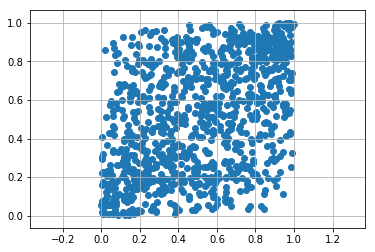

In [6]:
# Test the code
plt.scatter(U2[:,0], U2[:,1])
plt.axis('equal')
plt.grid()
plt.show()

# Simple CDE demo

* Assume that the individual loans have the default rate of 0.2 (20% of loans default every year)
* Let's package 10 (possibly sub-prime) loans into our CDO
* Create gaussian copula with rho = 0.5 vs 0.9
* Assume the maturity of our CDO is 1 year. 
* Assume the senior tranche is the bottom 50% of the loan (i.e. not affected by the first 40% loss)

In [63]:
# Gaussian copula 
lam = 0.2
n_sample=10000
U2 = CopulaGaussian(n_var=10, n_sample=n_sample, rho=0.5)

# Generate RNs for the default time
default_time = -np.log(U2)/lam

In [64]:
# Check that the average default time of the individual loans are around 5 years
print( np.mean(default_time, axis=0) )

# Compute the default ratio for the individual loans within 1 year
# it should be about 20%. Exactly 1-exp(-0.2)
print( "Exact default rate < 1yr:", 1 - np.exp(-0.2) )
print( np.sum(default_time < 1.0, axis=0) / n_sample )

[ 5.01954719  5.00976322  5.06185896  4.97783685  5.05091871  5.01279559
  5.0023097   4.97534655  4.98894927  4.96037712]
Exact default rate < 1yr: 0.181269246922
[ 0.1814  0.18    0.1809  0.1797  0.1771  0.184   0.1846  0.1796  0.1845
  0.1797]


In [65]:
# Count the total defaults in the pool within 1 year
default_total = np.sum(default_time < 1.0, axis=1)
print( default_total )

[0 1 0 ..., 5 4 2]


In [66]:
# Compute the percentage of the total default bigger than 4
# This is the probability of the senior tranche having any loss
sum(default_total > 5)/n_sample

0.089200000000000002

In [67]:
# We can also compute the expected recovery rate (out of 100)
np.mean(np.fmin(10-default_total,5))/5.0 * 100

95.878

## When the correlation is high, the default rate of the senior tranche CDO is just as bas as the individual loans (sub-prime)